# Project: Investigate the IMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

> **Objective**: Movie market is huge, along with more films were released over year, I would like to see which genres is the most common and also I would like to see if there are some factors could influence the profit. If I could have some insights those factors, then it might help them to make decision.

## Questions:
<ul>
<li><a href="#eda">Which genres are most popular from year to year?</a></li>
<li><a href="#eda">What kind of factors are correlated with movie profit(Means Return of investment)?</a></li>
</ul>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load the database
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Check the columns and data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
# Check the data completeness
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


#### Observation
* There is impossible that 'budget' and 'revenue' are 0, so the data should be imcompleted, so I will keep the movies have budge and revenue for the analysis.
* Also for the genres, there are 23 records without genres, so will remove those missing data.
* For the first question, I will use release_year and genres columns,
* For the second quesion, I will use budget, revenue, release_year, release_date, runtime to analyze if the runtime and release year or month are correlate with ROI.

#### 1. Data Cleaning

In [6]:
# Drop the columns that I will not use this analysis.
df.drop(['original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj','revenue_adj'],axis=1,inplace=True)

In [7]:
# Clean up the data which is 0, fill them with none value.
df.replace(0, np.nan, inplace=True)

In [8]:
# Drop the data with none values.
df.dropna(inplace = True)

In [9]:
# Now we could see, the database dropped from 10866 to 3855, and the data looks more reasonable in terms of 
#describe infomation.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000


#### 2.Descriptive Analysis

When I remove the outliers, only look at with 3std range data, 
* The release year was from 1960 to 2015;
* The median popularity is 0.79
* The median budget is 22 million;
* The median revenue is 42 million;
* The median runtime is 105 min, the distribution looks normal;

In [10]:
df[(np.abs(stats.zscore(df[['budget','runtime']])) < 3).all(axis=1)].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3712.000000,3712.000000,3.712000e+03,3.712000e+03,3712.000000,3712.000000,3712.000000,3712.000000
mean,40032.351024,1.113766,3.323499e+07,9.384312e+07,107.682651,465.028287,6.144343,2001.244073
std,67790.829803,1.299782,3.323797e+07,1.386522e+08,16.767532,739.006261,0.786949,11.119678
min,5.000000,0.001117,1.000000e+00,2.000000e+00,62.000000,10.000000,2.200000,1960.000000
25%,6474.250000,0.455133,1.000000e+07,1.312500e+07,95.000000,68.000000,5.600000,1995.000000
50%,11307.500000,0.785720,2.200000e+07,4.209941e+07,105.000000,195.000000,6.200000,2004.000000
75%,38319.500000,1.320533,4.600000e+07,1.166797e+08,118.000000,530.000000,6.700000,2010.000000
max,417859.000000,32.985763,1.630000e+08,1.513529e+09,168.000000,9767.000000,8.400000,2015.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10db70a90>,
      dtype=object)

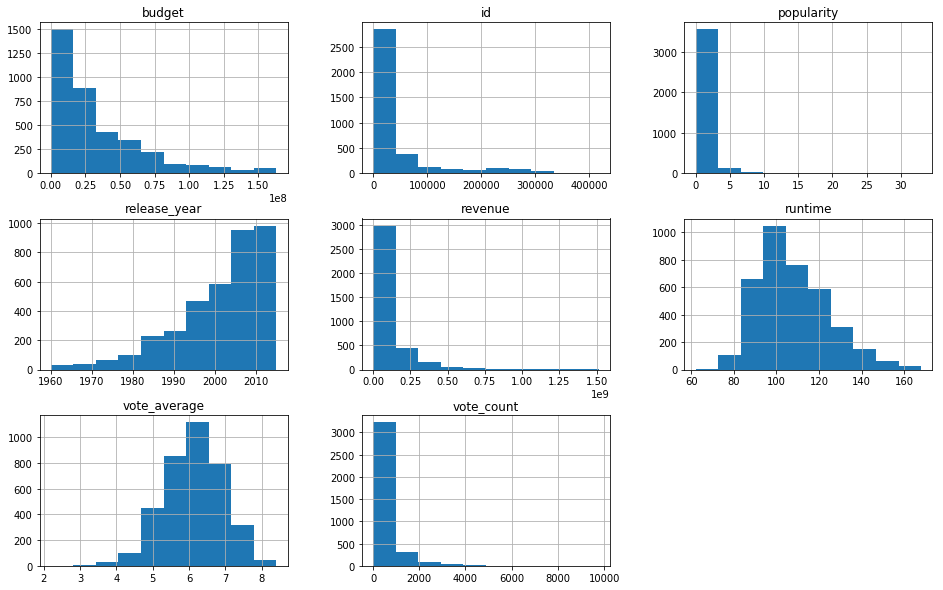

In [11]:
df[(np.abs(stats.zscore(df[['budget','runtime']])) < 3).all(axis=1)].hist(figsize=(16,10))

#### 3. Look at the time series, to see how they change over time
* The numbers of movies released increased along with year
* The avg runtime looks going down a bit
* The budget and revenue looks going up overtime.
* The popularity and vote_average looks not big change overtime.

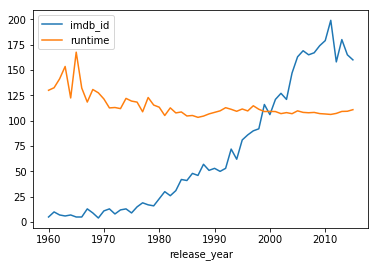

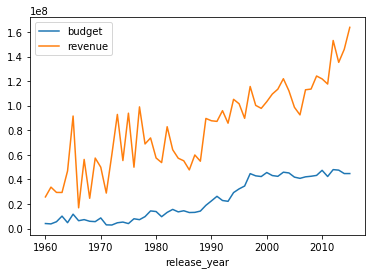

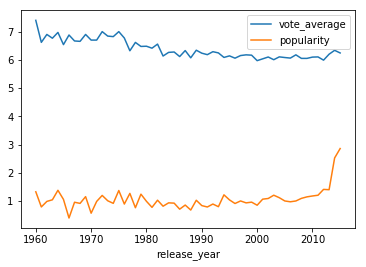

In [12]:
df.groupby('release_year').agg({'imdb_id':np.size,  'runtime':np.mean}).plot()
df.groupby('release_year').agg({'budget':np.mean, 'revenue':np.mean}).plot()
df.groupby('release_year').agg({'vote_average':np.mean, 'popularity':np.mean}).plot()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: Which genres are most popular from year to year?

#### 1. First, have a overview, what kind of genres there are, and the number of movies in the specific genres

In [16]:
# For the genres column, there are multivalue in one row, so I need split them and then do the statistics.
genre_details = df['genres'].str.split('|', expand=True)
genre_details.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

Drama              1757.0
Comedy             1358.0
Thriller           1205.0
Action             1086.0
Adventure           749.0
Romance             667.0
Crime               652.0
Science Fiction     520.0
Horror              463.0
Family              425.0
Fantasy             396.0
Mystery             344.0
Animation           201.0
Music               136.0
History             129.0
War                 119.0
Western              52.0
Documentary          35.0
Foreign              13.0
TV Movie              1.0
dtype: float64

#### 2. Generate the dataframe, and would like to analyze, which genres are most popular from year to year?

In [17]:
# generate the unique genres list.
df_genres = df['genres'].tolist()
genres = []
for i in df_genres:
    if i is not None:
        split_genre = i.split('|')
        for j in split_genre:
            if j not in genres:
                genres.append(j)

In [18]:
# Create a dataframe, using genres as index, and year as column, and calculate for the specific year and genres,
# what's popularity, and then we could track the trends over time.

popularity_df = pd.DataFrame(index = genres, columns = range(df['release_year'].min(), df['release_year'].max() + 1))
popularity_df = popularity_df.fillna(value = 0.0)
popularity = np.array(df['popularity'])
year = np.array(df['release_year'])

print (len(popularity[popularity==0]))
# index to access year value
z = 0
for i in df_genres:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
            popularity_df.loc[j, year[z]] = popularity_df.loc[j, year[z]] + popularity[z]
    z+=1
popularity_df

0


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,3.009075,0.928279,3.696759,2.715396,3.153791,2.532622,0.695579,4.015400,1.356276,1.778746,...,45.214271,49.787810,71.755938,70.883424,80.026333,92.110903,87.006893,93.236770,176.235917,200.267831
Adventure,1.872132,3.386535,4.865526,3.172561,3.153791,2.532622,0.507168,6.807387,5.031555,2.394635,...,42.210460,37.756058,52.488010,66.043675,67.552506,59.577266,62.935832,73.913796,148.341227,199.382091
Science Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207257,0.000000,4.507375,0.000000,...,16.884195,15.428433,29.513268,55.745086,29.882181,43.341604,40.382077,57.654333,126.101965,167.082032
Thriller,2.610362,0.000000,3.170651,4.092655,3.817237,1.910465,0.402730,2.569521,0.786854,1.778746,...,57.165286,62.800272,61.675756,66.378336,70.802156,83.599347,73.186281,77.372798,116.791205,183.929619
Fantasy,0.000000,0.000000,0.000000,0.000000,1.987819,0.000000,0.000000,0.241283,0.000000,0.000000,...,26.712414,35.191101,26.085987,37.426758,36.763215,37.566325,37.832559,32.236092,55.176084,43.241109
Crime,0.000000,0.900245,0.810805,0.000000,0.663446,0.000000,0.000000,2.715840,0.786854,1.357317,...,25.523123,32.087640,36.583606,16.239235,27.154970,34.648336,33.753904,47.915296,34.454964,69.647798
Western,1.872132,0.173731,1.033186,0.000000,0.000000,0.000000,0.395668,0.000000,0.621202,1.973206,...,0.463068,1.804135,0.646244,0.000000,3.374361,3.139365,5.944518,1.602102,0.870104,15.009100
Drama,4.694612,4.518134,3.206667,1.676020,3.690725,2.741762,0.970185,5.478296,3.137832,2.217123,...,72.886690,66.947229,74.019136,77.922543,75.953710,83.008665,87.219776,97.530711,164.252847,165.348458
Family,0.000000,2.935770,0.000000,0.000000,2.621701,1.313676,0.000000,2.791987,0.633129,0.000000,...,31.672347,28.429192,27.189187,36.246911,39.778978,33.055324,19.316146,29.330542,33.520186,43.861123
Animation,0.000000,2.631987,0.000000,0.000000,0.000000,0.000000,0.000000,2.550704,0.000000,0.000000,...,18.447325,13.594778,16.577006,24.137930,18.502974,18.959523,18.676666,23.813636,27.173109,28.528160


#### 3. Visuralize the popularity trends over year by genres.

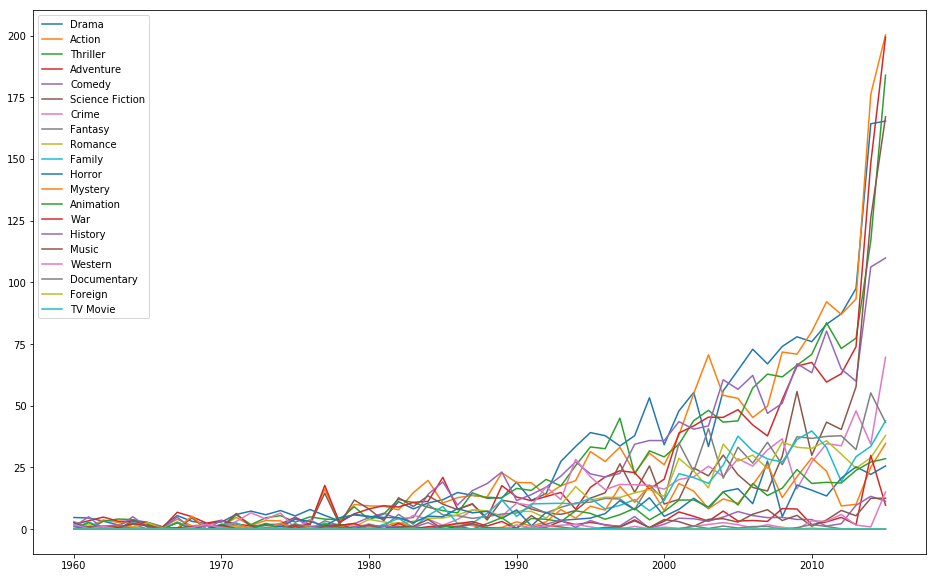

In [19]:
# Sort the dataframe by the total popularity in that genres and plot the chart
idd = popularity_df.sum(axis=1).sort_values(ascending=False).index
popularity_df.loc[idd].transpose().plot(figsize=(16,10))

#### Conclusion for the first question:
* The top three common popular genre are Drama, Comedy and Thriller over year.

### Question 2: What kind of factors are correlated with movie profit(Means Return of investment)?

#### 1. General overview how many of movies made profit, what percentage?

* Along with more films were released, the proportion of profitable films looks getting down

In [20]:
# Create a new column as ROI
df['ROI'] = df['revenue']- df['budget']
df['profit'] = df['revenue'] - df['budget']>0

In [21]:
df['ROI'].describe()

count    3.855000e+03
mean     7.045710e+07
std      1.506085e+08
min     -4.139124e+08
25%     -1.325776e+06
50%      2.000718e+07
75%      8.168326e+07
max      2.544506e+09
Name: ROI, dtype: float64

In [22]:
# Create a function to get the percentage of profit films.
def get_stats(data):
    data_count = pd.DataFrame(data['release_year'].value_counts())
    roi_count = pd.DataFrame(data[data['ROI']>0].release_year.value_counts())
    return data_count.merge(roi_count, how = 'left', left_index=True, right_index=True, sort=True, suffixes=('_total_movie', '_profitable_movie'))

In [23]:
release_roi = get_stats(df)

In [24]:
release_roi['proportion'] = release_roi['release_year_profitable_movie']*1.0/release_roi['release_year_total_movie']

Text(0.5,1,'Profitable proportion of total movie')

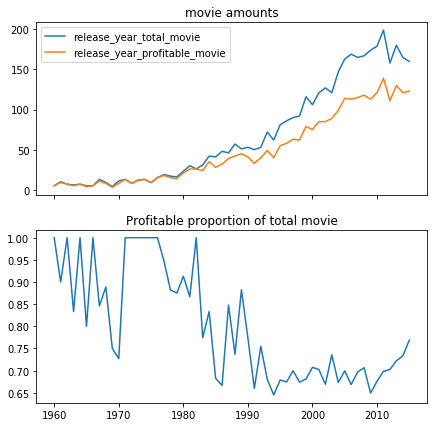

In [25]:
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

release_roi[['release_year_total_movie', 'release_year_profitable_movie']].plot(ax=axes[0]); axes[0].set_title('movie amounts')
release_roi['proportion'].plot(ax=axes[1]); axes[1].set_title('Profitable proportion of total movie')

#### 2. Feature selecting 

#### Conclusion:
* Release_month have different distribution in profit films and nonprofit films, Amongst the profit films, the release year were more likely last month of each quarter.
* Release_month, Runtime and budget have significant correlation with profit, but R square are too low, so I need dig into that.

In [26]:
df['release_month'] = pd.to_datetime(df['release_date']).dt.month

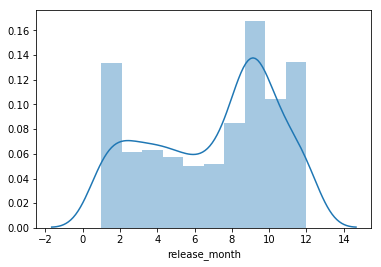

In [27]:
sns.distplot(df[df['ROI']<0].release_month)

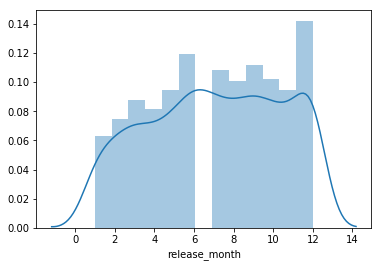

In [28]:
sns.distplot(df[df['ROI']>0].release_month)

In [31]:
# Using logistic regression to analyze if there is significant correlation between release_month and profit
logit = sm.Logit(df['profit'], df['release_month'])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.609380
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 profit   No. Observations:                 3855
Model:                          Logit   Df Residuals:                     3854
Method:                           MLE   Df Model:                            0
Date:                Thu, 28 Jun 2018   Pseudo R-squ.:                -0.02873
Time:                        09:55:20   Log-Likelihood:                -2349.2
converged:                       True   LL-Null:                       -2283.6
                                        LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
release_month     0.1126      0.005     23.690      0.000       0.103       0.122


In [30]:
# Using logistic regression to analyze if there is significant correlation between runtime and profit
logit = sm.Logit(df['profit'], df['runtime'])
result2 = logit.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.589238
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 profit   No. Observations:                 3855
Model:                          Logit   Df Residuals:                     3854
Method:                           MLE   Df Model:                            0
Date:                Thu, 28 Jun 2018   Pseudo R-squ.:                0.005278
Time:                        09:55:18   Log-Likelihood:                -2271.5
converged:                       True   LL-Null:                       -2283.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
runtime        0.0088      0.000     26.563      0.000       0.008       0.009


In [32]:
# Using logistic regression to analyze if there is significant correlation between budget and profit
logit = sm.Logit(df['profit'], df['budget'])
result3 = logit.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.610763
         Iterations 2
                           Logit Regression Results                           
Dep. Variable:                 profit   No. Observations:                 3855
Model:                          Logit   Df Residuals:                     3854
Method:                           MLE   Df Model:                            0
Date:                Thu, 28 Jun 2018   Pseudo R-squ.:                -0.03106
Time:                        09:55:40   Log-Likelihood:                -2354.5
converged:                       True   LL-Null:                       -2283.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
budget      1.808e-08   9.01e-10     20.069      0.000    1.63e-08    1.98e-08


<a id='conclusions'></a>
## Conclusions

>**Objective** Again: Movie market is huge, along with more films were released over year, I would like to see which genres is the most common and also I would like to see if there are some factors could influence the profit. If I could have some insights those factors, then it might help them to make decision.

* According to the exploration of IMDB data, interesting to find:
    * The numbers of movies released increased along with year.
    * The budget and revenue looks going up overtime, but the profitble films proportion looks going down, which means even though there are lots of films making a loss.
    * The popularity and vote_average looks not big change overtime.
    * The avg runtime looks going down a bit.
   
* Which genres are most popular from year to year?
    * The top three common popular genre are Drama, Comedy and Thriller over year.
* What kind of factors are correlated with movie profit(Means Return of investment)?
    * Release_month have different distribution in profit films and nonprofit films, Amongst the profit films, the release year were more likely last month of each quarter.
    * Release_month, Runtime and budget have significant correlation with profit, but R square are too low, so I need dig into that.
    
> *Follow-up* I will try to do more feature engineering for predicting the getting profit.